# Creating Cohorts of Songs

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows",None)

#### Importing the dataset

In [2]:
data = pd.read_csv('rolling_stones_spotify.csv')
data.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [3]:
# the first column is named improperly, so we can drop the column named 'Unnamed: 0'

data = data.drop(data.columns[0], axis=1)

In [4]:
data.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4            Don’t Stop - Live  Licked Live In NYC   2022-06-10             5   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993          0.996000     0.932   -12.913       0.1100   
1         0.326   0.965          0.233000     0.961    -4.803       0.0759   
2         0.386   0.969          0.400000     0.956    -4.936       0.1150   
3         0.369   0.985          0.000107     0.895    -5.535       0.1930   
4         0.303   0.969          0.055900     0.966    -5.098       0.0930   

     tempo  valence  popularity  duration_ms  
0  118.001   0.0302          33        48640  
1  131.455   0.3180          34       253173  
2  130.066   0.3130          34       263160  
3  132.994   0.1470          32       305880  
4  130.533   0.2060          32       305106

In [5]:
data.shape

(1610, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


#### Checking for outliers

In [7]:
data.describe(include=['float64','int64'])

track_number  acousticness  danceability       energy  \
count   1610.000000   1610.000000   1610.000000  1610.000000   
mean       8.613665      0.250475      0.468860     0.792352   
std        6.560220      0.227397      0.141775     0.179886   
min        1.000000      0.000009      0.104000     0.141000   
25%        4.000000      0.058350      0.362250     0.674000   
50%        7.000000      0.183000      0.458000     0.848500   
75%       11.000000      0.403750      0.578000     0.945000   
max       47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

In [8]:
data.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

<Axes: >

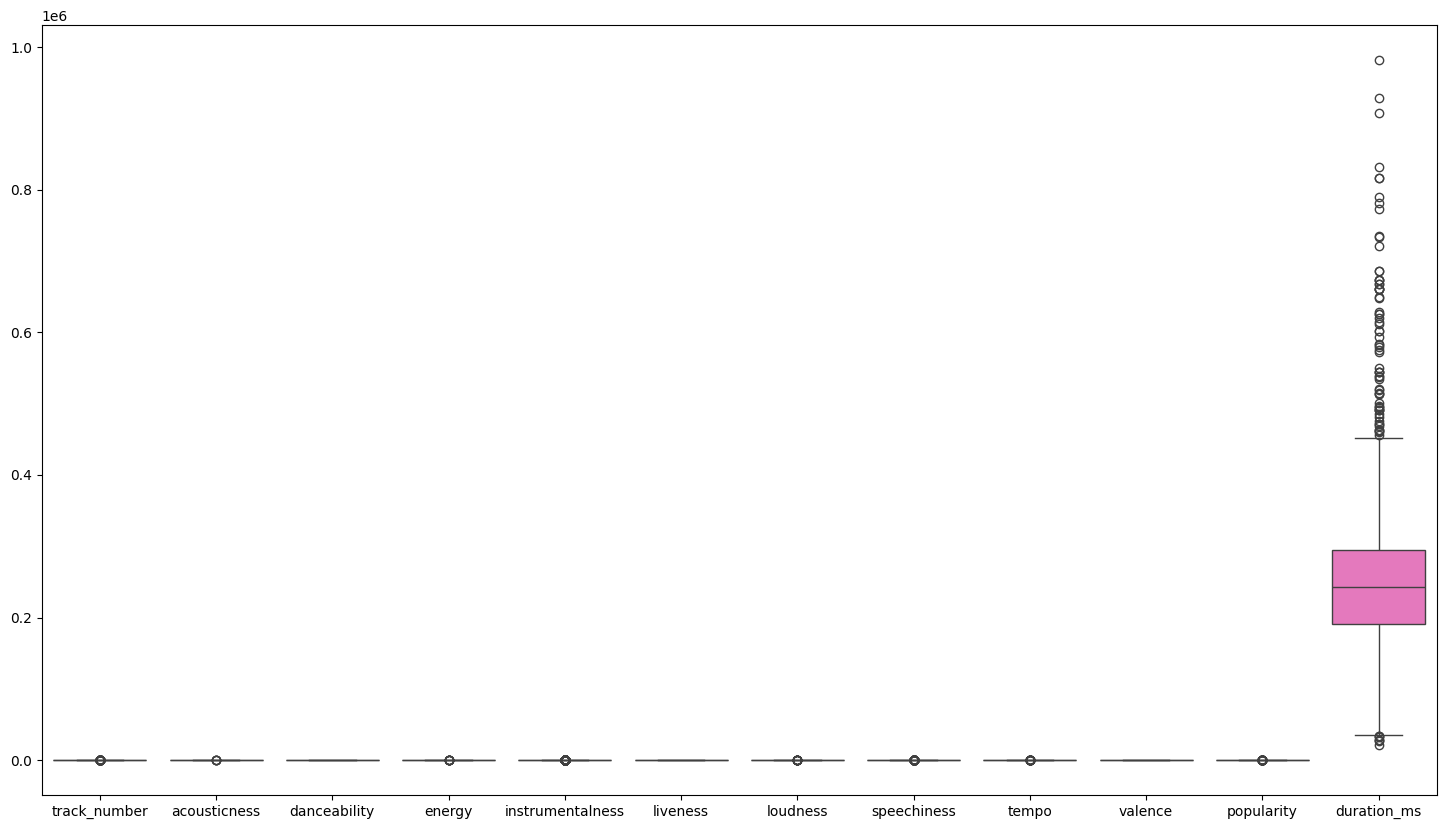

In [9]:
# using boxplot for checking outliers

plt.figure(figsize=(18,10))
sns.boxplot(data=data)

<Axes: xlabel='duration_ms', ylabel='Count'>

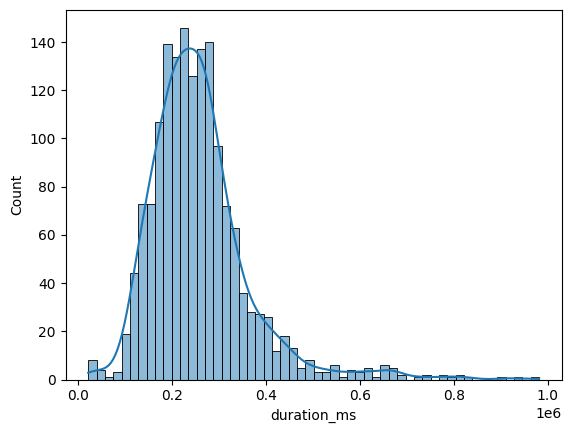

In [10]:
# using histogram plot for the 'duration_ms' column

sns.histplot(data['duration_ms'], kde='True')

From the above two plots we can infer that:
1. From boxplot we found that the duration_ms variable has outlers
2. from the histogram plot of the variable we found that it is right skewed.

#### Checking for irrelevant data entries

In [11]:
duplicate_rows = data[data.duplicated()]
duplicate_rows.count()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

No duplicate rows in the dataset

#### Checking for null values

In [12]:
data.isnull().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

#### Utilizing suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

In [13]:
data['popularity'].describe()

count    1610.000000
mean       20.788199
std        12.426859
min         0.000000
25%        13.000000
50%        20.000000
75%        27.000000
max        80.000000
Name: popularity, dtype: float64

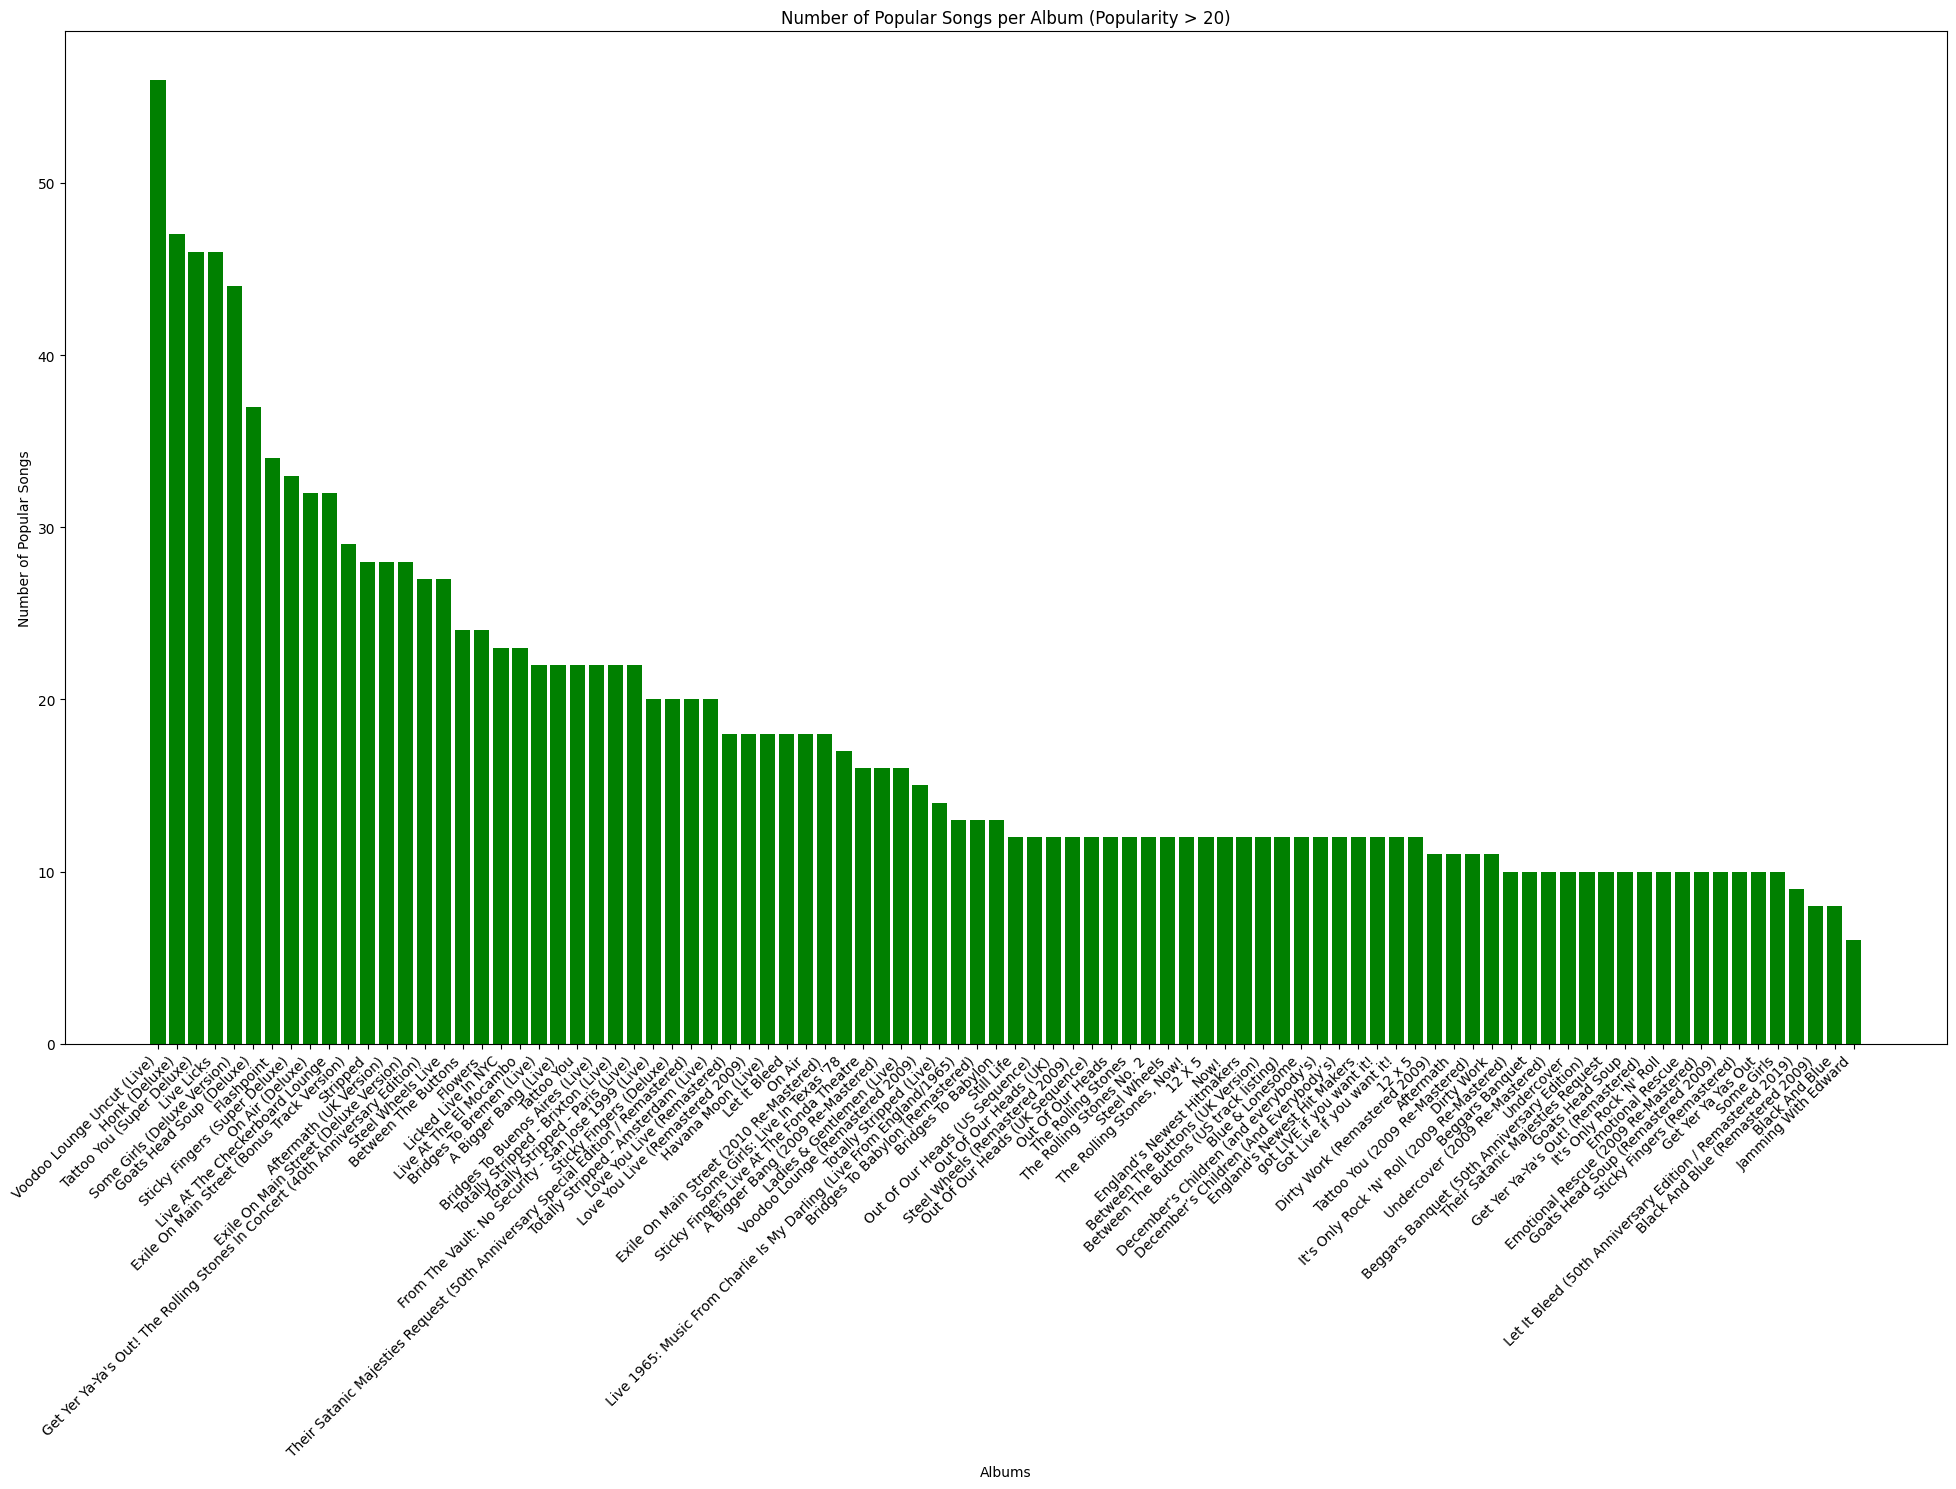

In [14]:
# grouping the the ablums with the count of popular songs in descending order
df = data.groupby('album')['popularity'].count().sort_values(ascending=False)


# plottinh the graph of the total no. of popular songs per album arranged in descending order
plt.figure(figsize=(20, 15)) 

plt.bar(df.index, df.values, color='green')

# Customize the plot (add labels, title, etc.)
plt.xlabel('Albums')
plt.ylabel('Number of Popular Songs')
plt.title('Number of Popular Songs per Album (Popularity > 20)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()  # Adjust spacing
plt.show()

In [15]:
# top two albums having the highest count of popular songs
print(f"\"{df.keys()[0]}\", \"{df.keys()[1]}\" are two albums that should be recommended to anyone based on the number of popular songs in each album")

"Voodoo Lounge Uncut (Live)", "Honk (Deluxe)" are two albums that should be recommended to anyone based on the number of popular songs in each album


#### Using EDA to delve into various features of songs, aiming to identify patterns

<Figure size 2000x2000 with 0 Axes>

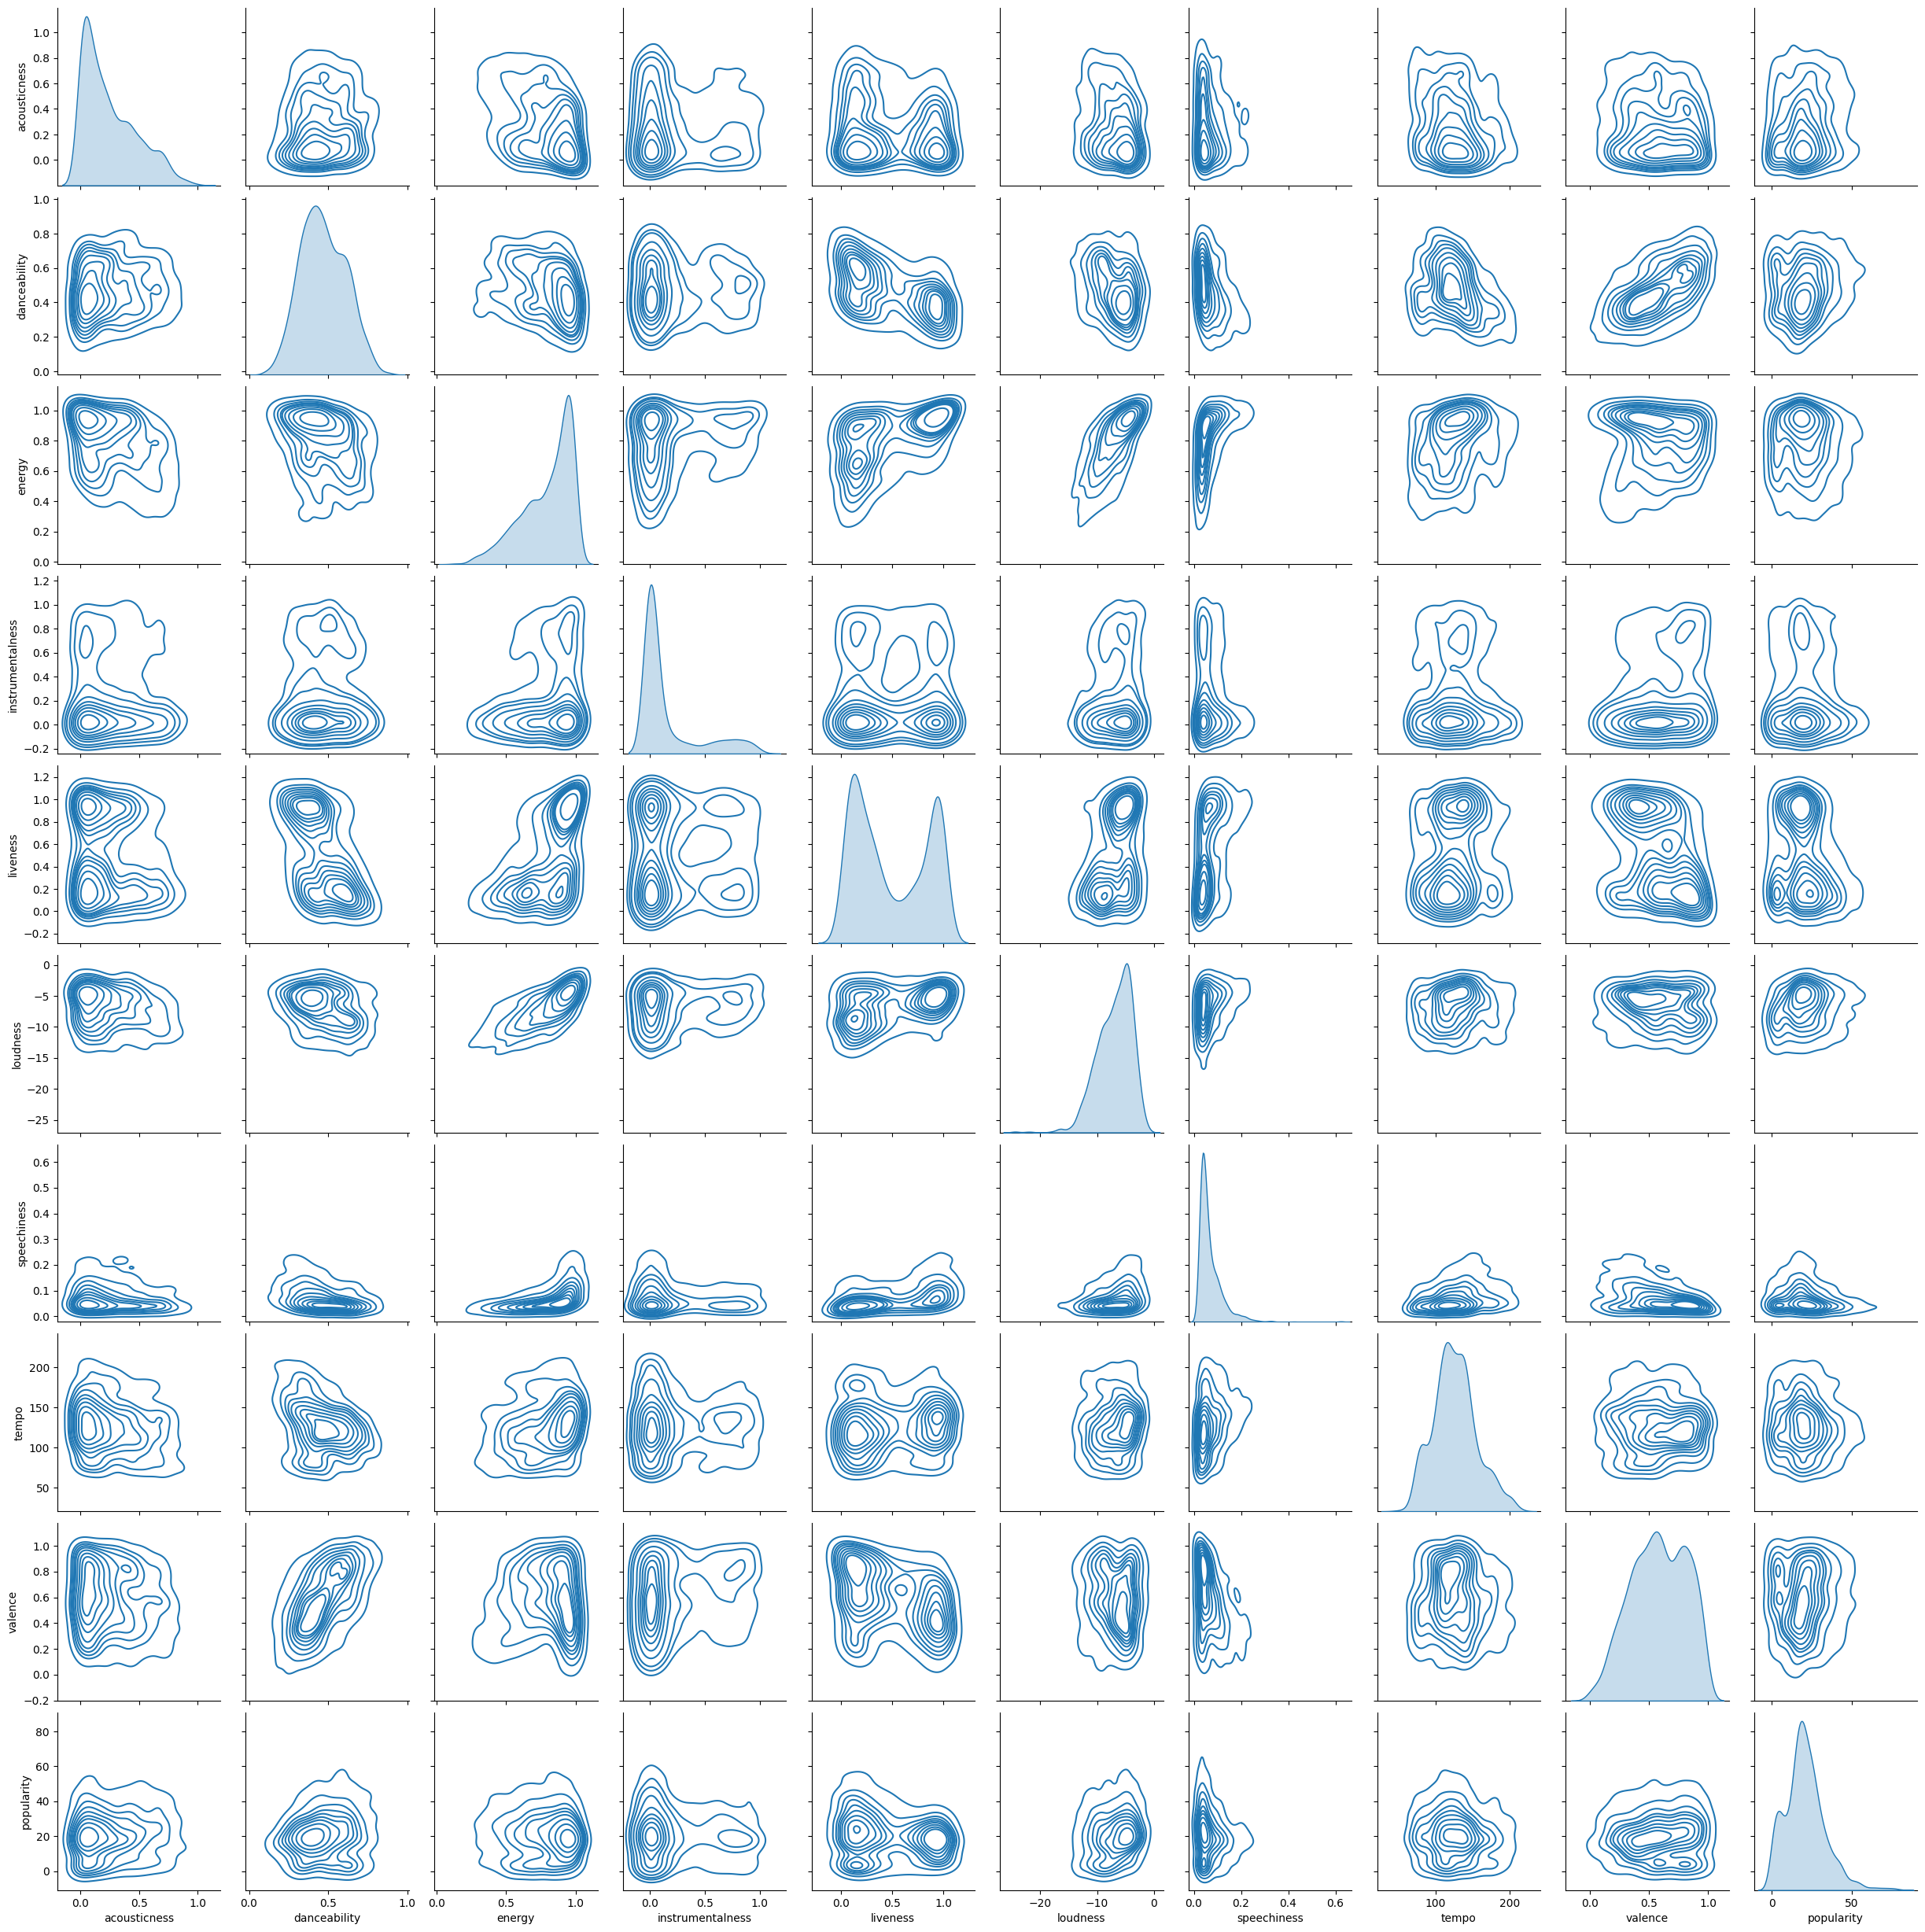

In [16]:
# using pairplot to see the relationships between different variables

df = data[['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]
plt.figure(figsize=(20,20))
sns.pairplot(df, kind='kde', dropna=True)

#### Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

<Axes: >

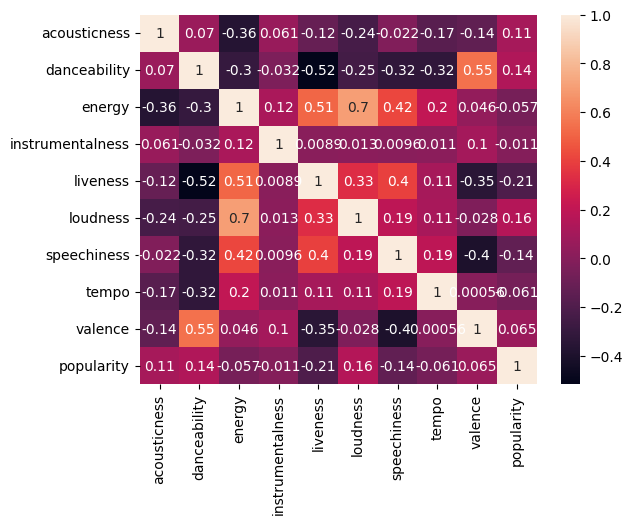

In [17]:
#using correlation matrix
df = data[['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]
# fig, ax = plt.subplot(figsize=(15,7))
corr = df.corr()
sns.heatmap(corr, annot=True)

<b>=> Inference:</b><br><br>
<b>positively correlated:</b>
1. 'loudness' and 'energy'
2. 'danceability' and 'valence'
3. 'liveness' and 'energy'
4. 'speechiness' and 'energy'
5. 'liveness' and 'speechiness'
6. 'loudness' and 'liveness'

<b>negatively correlated:</b>
1. 'danceability' and 'liveness'
2. 'speechiness' and 'valence'
3. 'valence' and 'liveness'

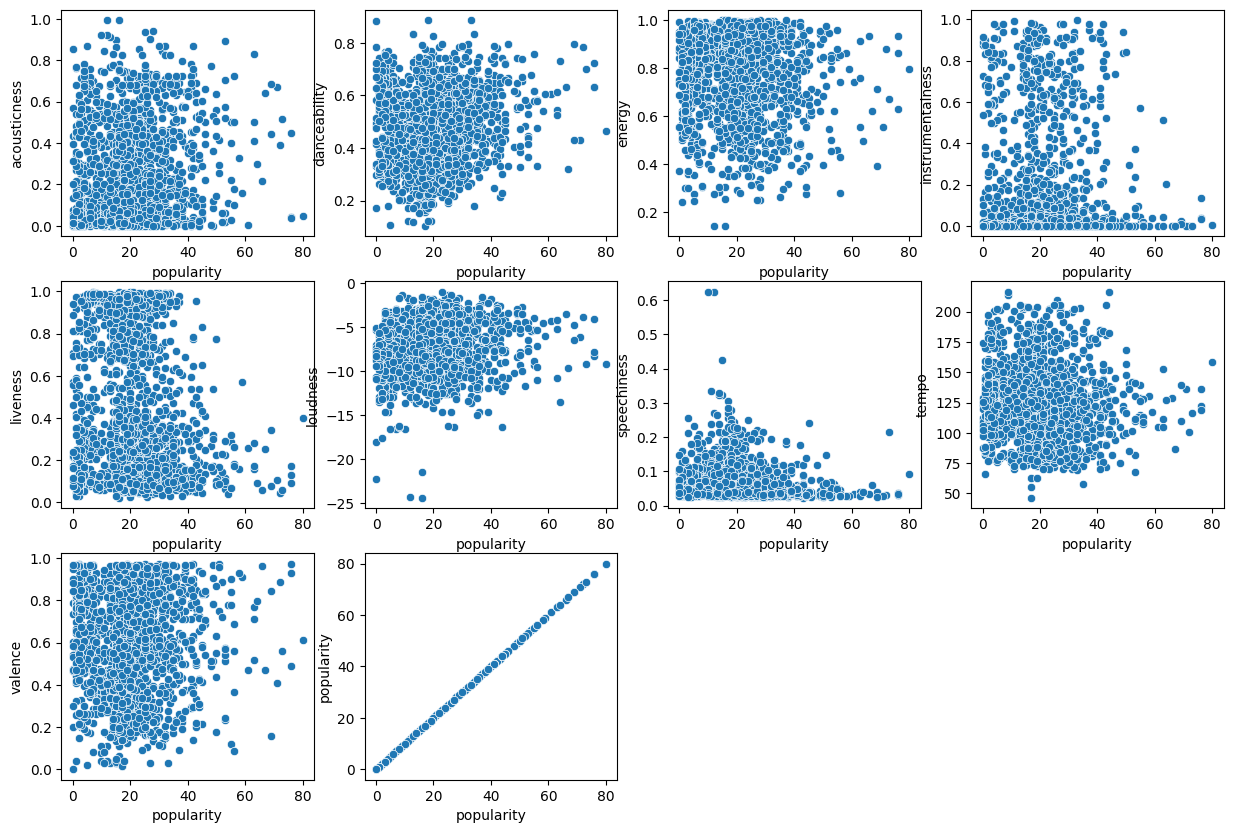

In [18]:
plt.figure(figsize=(15,10))
for index, value in enumerate(df.columns, start=1):
    plt.subplot(3,4,index)
    sns.scatterplot(x=df['popularity'], y=df[value])

From the above scatter plots among popularity and other factors of a song we counldn't find any factor that is strongly related to the popularity of the songs. all of them are positively correlated but not so strongly. Only the Valence is highly related to popularity among other factors

<Axes: xlabel='duration_ms', ylabel='popularity'>

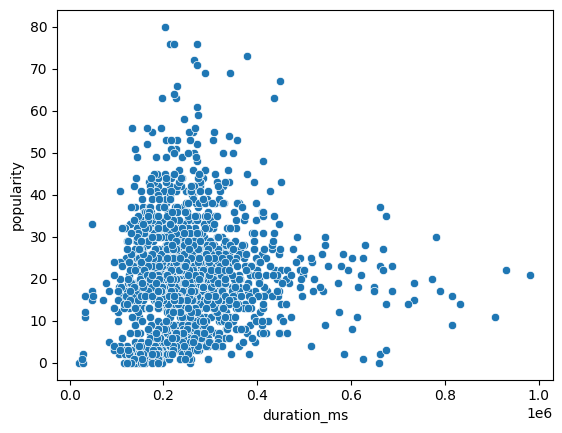

In [19]:
sns.scatterplot(x=data['duration_ms'], y=data['popularity'])

There is the duration of the song is not so strongly correlated to the popularity of the song

Text(0, 0.5, 'Popularity')

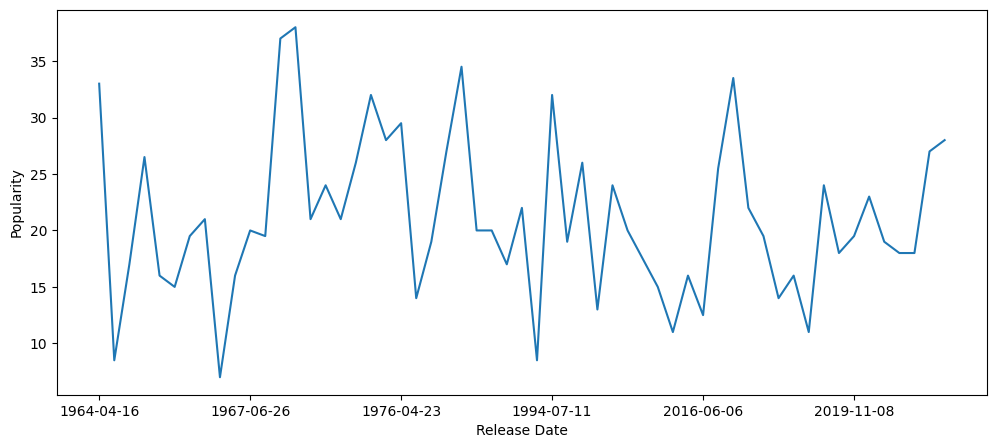

In [20]:
plt.figure(figsize=(12,5))
data.groupby('release_date')['popularity'].median().plot()
plt.xlabel('Release Date')
plt.ylabel('Popularity')

From the above plot we can infer that there is no relation between release date and the popularity of the song

#### Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

In [21]:
data.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [22]:
# we have to choose the columns that we will use to create the clusters

var = data.drop(['name', 'album', 'track_number', 'id', 'album', 'uri', 'release_date', 'duration_ms'], axis=1)
var.head()

acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  
0       0.1100  118.001   0.0302          33  
1       0.0759  131.455   0.3180          34  
2       0.1150  130.066   0.3130          34  
3       0.1930  132.994   0.1470          32  
4       0.0930  130.533   0.2060          32

In [23]:
# before applying Dimentionality Reduction using PCA we need to scale the var dataset to have a proper result

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
var_scaled = scaler.fit_transform(var)

print(type(var_scaled),'\n')
print(var_scaled)

<class 'numpy.ndarray'> 

[[-0.73935481 -0.0413433   1.11576419 ... -0.27651662 -2.38759041
   0.98299941]
 [ 0.82051776 -1.00796305  0.96006155 ...  0.18385207 -1.14267825
   1.06349527]
 [ 0.72813952 -0.58462593  0.98230478 ...  0.1363233  -1.16430633
   1.06349527]
 ...
 [ 0.53018615  2.265844   -0.10205293 ... -0.99393076  1.093665
   0.74151184]
 [-0.14725428  1.63083832 -1.36991733 ... -0.8023443  -0.21699652
   0.50002427]
 [ 0.58297372  1.82134003  0.78767647 ... -0.02761504  1.67329748
   1.14399113]]


In [24]:
# using PCA to reduce the number dimensions/variables/columns to aid the model training process

from sklearn.decomposition import PCA

pca = PCA(0.95)
var_pca = pca.fit_transform(var_scaled)

print(var_scaled.shape)
print(var_pca.shape)

(1610, 10)
(1610, 8)


So we can see that no. of dimensions are reduced to 8 from 10 retaining 95% of the information from the original variables

#### Significance of Dimensionality Reduction:
* Improves computational efficiency by reducing the number of dimensions.
* Makes it easier to analyze the model by dimensionality reduction which mitigates the issue of <b>Curse of Dimensionality</b>.
* Reduced dimensionality helps in better visualization of the data, enhance the cluster separation in clustering and in classification models that are trained on lower-dimensional data may generalize better.

#### Observations from the data that we are working with:
* We can manually remove may features like 'name', 'album', 'track_number', 'id', 'album', 'uri', 'release_date', 'duration_ms' from the original dataset to only keep the features that are related the song that will help in clustering
* among them we can apply PCA to find out the most important Principal Components that are holding the maximum information/variance
* after applying PCA the no. of dimensions/features decreased from 10 to 8

#### Clustering

We will use the dimensionality reduced variable set to make the clusters<br>We will use Kmeans clustering for this execution

In [25]:
#using wcss we can determine what would be the optimum no. of clusters

wcss = []

for i in range(1,1000) :
    
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=i , random_state=0)
    kmeans.fit(var_pca)
    wcss.append(kmeans.inertia_)

In [26]:
# wcss

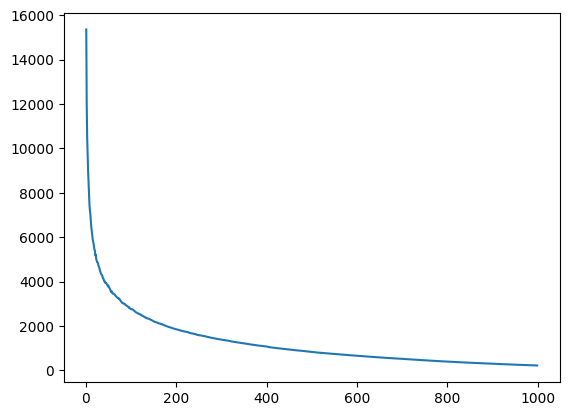

In [27]:
plt.plot(range(1,1000),wcss)

Here the right no. of clusters will be around 200. Lets take the no. of clusters be 170.

In [28]:
var_pca = pd.DataFrame(var_pca)

In [29]:
kmeans = KMeans(n_clusters=170 , random_state=0)
clusters= kmeans.fit_predict(var_pca)
var_pca['clusters'] = clusters

<Axes: >

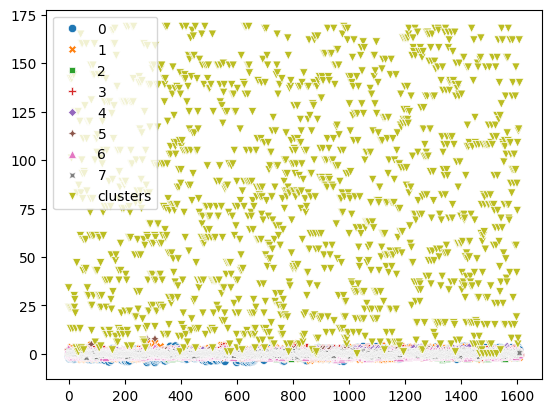

In [30]:
sns.scatterplot(data=var_pca)

We can see that the clustering is not proper using the PCA as information may be lost due to it. So we will try doing clustering on the original dataset with 10 features

Clustering with the original variables

In [31]:
var = data.drop(['album', 'name', 'track_number', 'id', 'album', 'uri', 'release_date', 'duration_ms'], axis=1)

In [32]:
#using wcss we can determine what would be the optimum no. of clusters

wcss = []

for i in range(1,100) :
    
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=i , random_state=0)
    kmeans.fit(var)
    wcss.append(kmeans.inertia_)

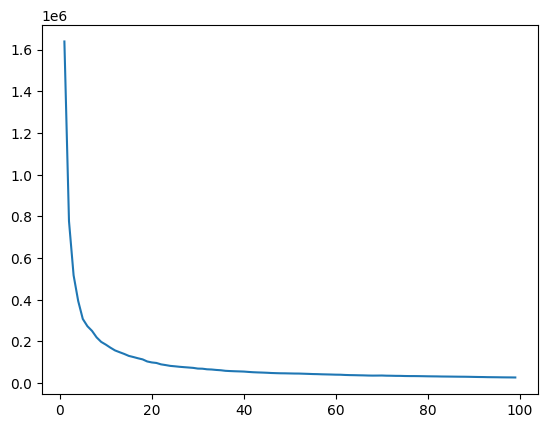

In [33]:
plt.plot(range(1,100),wcss)

In [34]:
kmeans = KMeans(n_clusters=20 , random_state=0)
clusters = kmeans.fit_predict(var)
var['clusters'] = clusters

In [35]:
var.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'clusters'],
      dtype='object')

<Axes: >

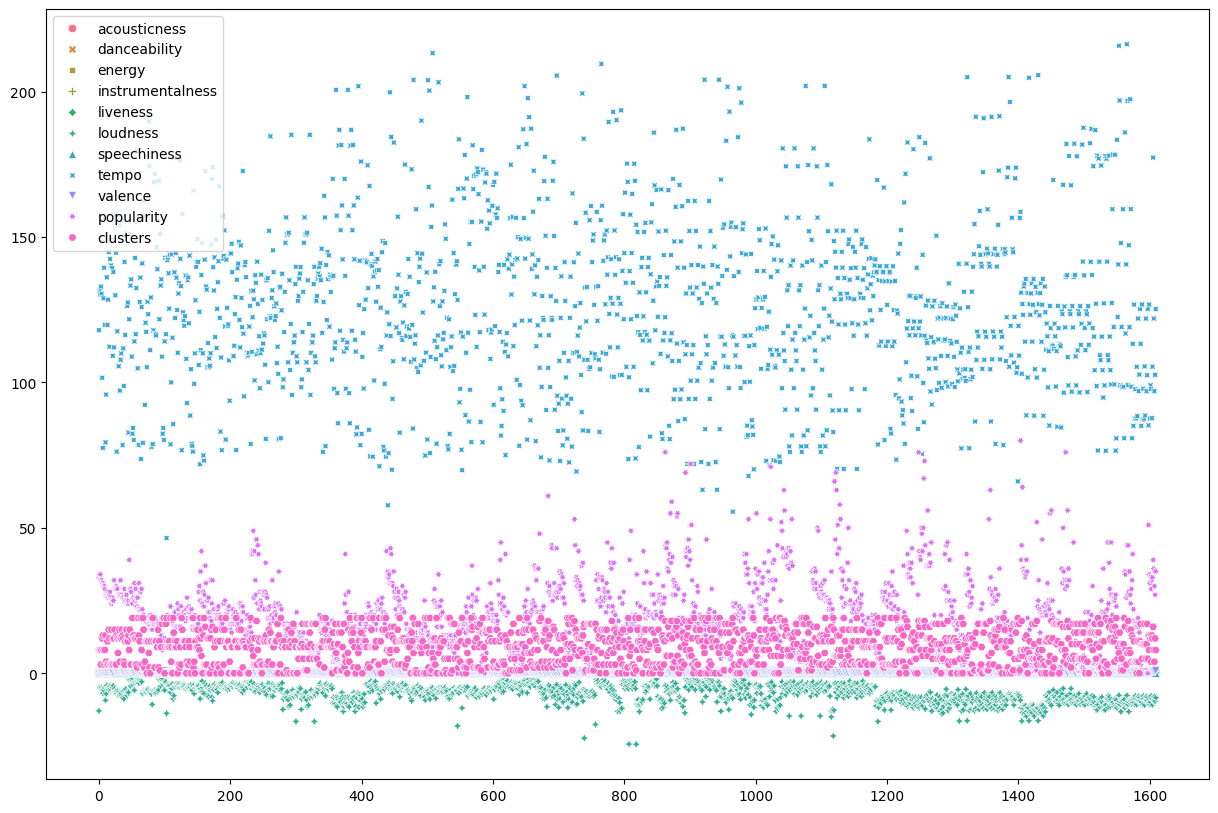

In [36]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=var)

Now clustering with the original data can be visualised better.

The right number of clusters is around 20. We checked it using WCSS

Clustering is done based on parameters like 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity'